In [48]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [50]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,750.00,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,100.00,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,50000.00,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,300.00,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,800.00,6.096910
...,...,...,...,...,...
5818,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,2.57,8.590067
5819,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,2.39,8.621602
5820,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,0.41,9.387216
5821,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,0.63,9.200659


# Canonical_smiles To secuence

In [51]:
import mlflow.keras
mlflow.autolog()
#! mlflow ui

2023/02/04 13:58:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2023/02/04 13:58:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/02/04 13:58:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


In [52]:
# Hyperparametros
test_size=0.2
padding_type = 'pre'   #post

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
max_len_idx = df['canonical_smiles'].apply(len).argmax()
min_len_idx = df['canonical_smiles'].apply(len).argmin()
max_len_idx, min_len_idx #(2930, 595)

(2929, 595)

In [55]:
X = df['canonical_smiles']
y = df['pIC50']

max(y), min(y)
#(18.0, -6.77)

(14.30102999566398, -6.77)

In [56]:
tk = Tokenizer(char_level=True, lower=False)
tk.fit_on_texts(X)
tk.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 'n': 13,
 '@': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 's': 30,
 '6': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [57]:
X_seq = tk.texts_to_sequences(X)
max_len = max([len(x) for x in X_seq])
X_seq_pad = pad_sequences(X_seq, padding=padding_type, maxlen=max_len)

In [58]:
X_seq_pad[max_len_idx]

array([ 2, 11,  2, 14, 14, 12,  5,  7,  2,  2, 11,  2, 14, 16, 12, 10, 11,
        2, 14, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 14, 14, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 14, 12,
       31,  3,  2,  4,  2,  2,  2, 11,  2, 14, 12, 35,  3,  2,  4, 11,  2,
       14, 14, 16, 12, 31,  2,  2, 11,  2, 14, 14, 12, 31, 36,  2, 11,  2,
       14, 14, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 14, 14, 16, 12,  5,  2, 11,
        2, 14, 14, 12, 10,  3,  2,  2, 11,  2, 14, 14, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 14, 14, 12,  3,  2,  4,  3,  2,  2, 11,  2, 14,
       14, 16, 12, 35, 31,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)

In [59]:
X_seq_pad[min_len_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

# Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=test_size, random_state=42)

In [62]:
len(X_train), len(y_train), len(X_test)

(4658, 4658, 1165)

In [63]:
X_train

array([[ 0,  0,  0, ...,  5,  6,  2],
       [ 0,  0,  0, ...,  2,  2,  5],
       [ 0,  0,  0, ..., 26, 17, 12],
       ...,
       [ 0,  0,  0, ...,  1,  1,  5],
       [ 0,  0,  0, ...,  4,  6,  7],
       [ 0,  0,  0, ...,  4, 24,  5]], dtype=int32)

In [64]:
X_train[:, ::-1]

array([[ 2,  6,  5, ...,  0,  0,  0],
       [ 5,  2,  2, ...,  0,  0,  0],
       [12, 17, 26, ...,  0,  0,  0],
       ...,
       [ 5,  1,  1, ...,  0,  0,  0],
       [ 7,  6,  4, ...,  0,  0,  0],
       [ 5, 24,  4, ...,  0,  0,  0]], dtype=int32)

# Data augmentation (Optional)

In [65]:
X_train = np.vstack([X_train, X_train[:, ::-1]])

In [66]:
X_train.shape

(9316, 207)

In [67]:
y_train = np.hstack([y_train, y_train])

In [68]:
y_train.shape

(9316,)

# Network Model

In [69]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [70]:
def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [71]:
vocab_size = len(tk.word_index)
vocab_size

38

In [72]:
max_sequence_len = X_seq_pad.shape[1]

In [73]:
# Hyperparametros
learning_rate=0.01 #0.01   0.05    1e-3
epochs = 200     #50    30
batch_size=128     #64      32

lstm = 100 #64   20
dense_size = 512 #100 #50
drops = 0.8   #0.4
embeddings = 128

In [74]:
model = Sequential()
model.add(Embedding(vocab_size + 1, embeddings, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(lstm, return_sequences=False, return_state=False, activation='tanh')))
model.add(Dense(dense_size))
model.add(Dropout(drops))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [75]:
model = Sequential()
model.add(Embedding(vocab_size + 1, embeddings, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(lstm, return_sequences=False, return_state=False, activation='tanh')))
model.add(Dense(dense_size))
model.add(BatchNormalization())
model.add(Dropout(drops))
model.add(Dense(dense_size))
model.add(BatchNormalization())
model.add(Dropout(drops))
model.add(Activation('relu'))
model.add(Dense(1, activation='linear'))

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 207, 128)          4992      
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              183200    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 512)               102912    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)              

In [77]:
model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='mse', metrics=[R2])

In [78]:
# callbacks
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")
earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, restore_best_weights=True)
reduceLR = ReduceLROnPlateau(monitor ='val_loss', factor=0.2, patience=15, verbose=1, mode='auto', min_delta=0.01, cooldown=0, min_lr=1e-8)

In [79]:
%%time
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[mcp, earlyStopping, reduceLR])

2023/02/04 13:58:12 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '45b22488bde840a4a5dab5b69ad6eb5d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/200
73/73 [==============================] - ETA: 0s - loss: 8.0116 - R2: -2.0935

INFO:tensorflow:Assets written to: models/best_model_1/assets


INFO:tensorflow:Assets written to: models/best_model_1/assets


73/73 [==============================] - 62s 804ms/step - loss: 8.0116 - R2: -2.0935 - val_loss: 153.2007 - val_R2: -55.9361 - lr: 0.0100
Epoch 2/200
73/73 [==============================] - 59s 805ms/step - loss: 5.0858 - R2: -0.9909 - val_loss: 317.0960 - val_R2: -116.9647 - lr: 0.0100
Epoch 3/200
73/73 [==============================] - ETA: 0s - loss: 4.4887 - R2: -0.7312

INFO:tensorflow:Assets written to: models/best_model_3/assets


INFO:tensorflow:Assets written to: models/best_model_3/assets


73/73 [==============================] - 66s 908ms/step - loss: 4.4887 - R2: -0.7312 - val_loss: 8.0969 - val_R2: -1.9491 - lr: 0.0100
Epoch 4/200
73/73 [==============================] - ETA: 0s - loss: 3.8546 - R2: -0.4857

INFO:tensorflow:Assets written to: models/best_model_4/assets


INFO:tensorflow:Assets written to: models/best_model_4/assets


73/73 [==============================] - 60s 819ms/step - loss: 3.8546 - R2: -0.4857 - val_loss: 3.4783 - val_R2: -0.2411 - lr: 0.0100
Epoch 5/200
73/73 [==============================] - 52s 711ms/step - loss: 3.7041 - R2: -0.4187 - val_loss: 11.1713 - val_R2: -3.0529 - lr: 0.0100
Epoch 6/200
73/73 [==============================] - ETA: 0s - loss: 3.3128 - R2: -0.2737

INFO:tensorflow:Assets written to: models/best_model_6/assets


INFO:tensorflow:Assets written to: models/best_model_6/assets


73/73 [==============================] - 76s 1s/step - loss: 3.3128 - R2: -0.2737 - val_loss: 2.4089 - val_R2: 0.1363 - lr: 0.0100
Epoch 7/200
73/73 [==============================] - 54s 742ms/step - loss: 3.0694 - R2: -0.1756 - val_loss: 2.5564 - val_R2: 0.0661 - lr: 0.0100
Epoch 8/200
73/73 [==============================] - ETA: 0s - loss: 2.8304 - R2: -0.0846

INFO:tensorflow:Assets written to: models/best_model_8/assets


INFO:tensorflow:Assets written to: models/best_model_8/assets


73/73 [==============================] - 61s 844ms/step - loss: 2.8304 - R2: -0.0846 - val_loss: 2.2705 - val_R2: 0.1796 - lr: 0.0100
Epoch 9/200
73/73 [==============================] - ETA: 0s - loss: 2.5662 - R2: 0.0223

INFO:tensorflow:Assets written to: models/best_model_9/assets


INFO:tensorflow:Assets written to: models/best_model_9/assets


73/73 [==============================] - 63s 862ms/step - loss: 2.5662 - R2: 0.0223 - val_loss: 2.2411 - val_R2: 0.1897 - lr: 0.0100
Epoch 10/200
73/73 [==============================] - 53s 730ms/step - loss: 2.4011 - R2: 0.0849 - val_loss: 2.6300 - val_R2: 0.0342 - lr: 0.0100
Epoch 11/200
73/73 [==============================] - 53s 722ms/step - loss: 2.2946 - R2: 0.1255 - val_loss: 2.3409 - val_R2: 0.1421 - lr: 0.0100
Epoch 12/200
73/73 [==============================] - ETA: 0s - loss: 2.1601 - R2: 0.1815

INFO:tensorflow:Assets written to: models/best_model_12/assets


INFO:tensorflow:Assets written to: models/best_model_12/assets


73/73 [==============================] - 61s 833ms/step - loss: 2.1601 - R2: 0.1815 - val_loss: 2.0719 - val_R2: 0.2620 - lr: 0.0100
Epoch 13/200
73/73 [==============================] - ETA: 0s - loss: 2.0748 - R2: 0.2106

INFO:tensorflow:Assets written to: models/best_model_13/assets


INFO:tensorflow:Assets written to: models/best_model_13/assets


73/73 [==============================] - 60s 827ms/step - loss: 2.0748 - R2: 0.2106 - val_loss: 1.9441 - val_R2: 0.2984 - lr: 0.0100
Epoch 14/200
73/73 [==============================] - 53s 727ms/step - loss: 1.9392 - R2: 0.2664 - val_loss: 2.5546 - val_R2: 0.0574 - lr: 0.0100
Epoch 15/200
73/73 [==============================] - 56s 767ms/step - loss: 1.8505 - R2: 0.2959 - val_loss: 1.9964 - val_R2: 0.2770 - lr: 0.0100
Epoch 16/200
73/73 [==============================] - ETA: 0s - loss: 1.8208 - R2: 0.3100

INFO:tensorflow:Assets written to: models/best_model_16/assets


INFO:tensorflow:Assets written to: models/best_model_16/assets


73/73 [==============================] - 72s 986ms/step - loss: 1.8208 - R2: 0.3100 - val_loss: 1.9229 - val_R2: 0.3057 - lr: 0.0100
Epoch 17/200
73/73 [==============================] - ETA: 0s - loss: 1.7314 - R2: 0.3444

INFO:tensorflow:Assets written to: models/best_model_17/assets


INFO:tensorflow:Assets written to: models/best_model_17/assets


73/73 [==============================] - 66s 907ms/step - loss: 1.7314 - R2: 0.3444 - val_loss: 1.8612 - val_R2: 0.3384 - lr: 0.0100
Epoch 18/200
73/73 [==============================] - ETA: 0s - loss: 1.6985 - R2: 0.3572

INFO:tensorflow:Assets written to: models/best_model_18/assets


INFO:tensorflow:Assets written to: models/best_model_18/assets


73/73 [==============================] - 72s 996ms/step - loss: 1.6985 - R2: 0.3572 - val_loss: 1.7551 - val_R2: 0.3805 - lr: 0.0100
Epoch 19/200
73/73 [==============================] - 57s 773ms/step - loss: 1.6676 - R2: 0.3687 - val_loss: 2.0145 - val_R2: 0.2764 - lr: 0.0100
Epoch 20/200
73/73 [==============================] - 54s 743ms/step - loss: 1.6728 - R2: 0.3692 - val_loss: 2.0479 - val_R2: 0.2533 - lr: 0.0100
Epoch 21/200
73/73 [==============================] - ETA: 0s - loss: 1.5814 - R2: 0.3995

INFO:tensorflow:Assets written to: models/best_model_21/assets


INFO:tensorflow:Assets written to: models/best_model_21/assets


73/73 [==============================] - 62s 852ms/step - loss: 1.5814 - R2: 0.3995 - val_loss: 1.6878 - val_R2: 0.4017 - lr: 0.0100
Epoch 22/200
73/73 [==============================] - 59s 815ms/step - loss: 1.5344 - R2: 0.4200 - val_loss: 1.7907 - val_R2: 0.3590 - lr: 0.0100
Epoch 23/200
73/73 [==============================] - 54s 745ms/step - loss: 1.5352 - R2: 0.4197 - val_loss: 1.8466 - val_R2: 0.3499 - lr: 0.0100
Epoch 24/200
73/73 [==============================] - ETA: 0s - loss: 1.5648 - R2: 0.4029

INFO:tensorflow:Assets written to: models/best_model_24/assets


INFO:tensorflow:Assets written to: models/best_model_24/assets


73/73 [==============================] - 62s 857ms/step - loss: 1.5648 - R2: 0.4029 - val_loss: 1.6758 - val_R2: 0.4018 - lr: 0.0100
Epoch 25/200
73/73 [==============================] - 54s 735ms/step - loss: 1.4725 - R2: 0.4448 - val_loss: 2.7186 - val_R2: 0.0040 - lr: 0.0100
Epoch 26/200
73/73 [==============================] - ETA: 0s - loss: 1.4385 - R2: 0.4537

INFO:tensorflow:Assets written to: models/best_model_26/assets


INFO:tensorflow:Assets written to: models/best_model_26/assets


73/73 [==============================] - 62s 849ms/step - loss: 1.4385 - R2: 0.4537 - val_loss: 1.6632 - val_R2: 0.4068 - lr: 0.0100
Epoch 27/200
73/73 [==============================] - ETA: 0s - loss: 1.3967 - R2: 0.4760

INFO:tensorflow:Assets written to: models/best_model_27/assets


INFO:tensorflow:Assets written to: models/best_model_27/assets


73/73 [==============================] - 62s 848ms/step - loss: 1.3967 - R2: 0.4760 - val_loss: 1.5964 - val_R2: 0.4312 - lr: 0.0100
Epoch 28/200
73/73 [==============================] - ETA: 0s - loss: 1.3765 - R2: 0.4772

INFO:tensorflow:Assets written to: models/best_model_28/assets


INFO:tensorflow:Assets written to: models/best_model_28/assets


73/73 [==============================] - 66s 900ms/step - loss: 1.3765 - R2: 0.4772 - val_loss: 1.5491 - val_R2: 0.4405 - lr: 0.0100
Epoch 29/200
73/73 [==============================] - ETA: 0s - loss: 1.3460 - R2: 0.4896

INFO:tensorflow:Assets written to: models/best_model_29/assets


INFO:tensorflow:Assets written to: models/best_model_29/assets


73/73 [==============================] - 74s 1s/step - loss: 1.3460 - R2: 0.4896 - val_loss: 1.4295 - val_R2: 0.4987 - lr: 0.0100
Epoch 30/200
73/73 [==============================] - 60s 822ms/step - loss: 1.3099 - R2: 0.5020 - val_loss: 1.5256 - val_R2: 0.4559 - lr: 0.0100
Epoch 31/200
73/73 [==============================] - 61s 832ms/step - loss: 1.3005 - R2: 0.5061 - val_loss: 1.5817 - val_R2: 0.4461 - lr: 0.0100
Epoch 32/200
73/73 [==============================] - 53s 719ms/step - loss: 1.3083 - R2: 0.5046 - val_loss: 1.4614 - val_R2: 0.4909 - lr: 0.0100
Epoch 33/200
73/73 [==============================] - 58s 790ms/step - loss: 1.2527 - R2: 0.5185 - val_loss: 1.5739 - val_R2: 0.4412 - lr: 0.0100
Epoch 34/200
73/73 [==============================] - 61s 841ms/step - loss: 1.2228 - R2: 0.5390 - val_loss: 1.4306 - val_R2: 0.4843 - lr: 0.0100
Epoch 35/200
73/73 [==============================] - ETA: 0s - loss: 1.2331 - R2: 0.5315

INFO:tensorflow:Assets written to: models/best_model_35/assets


INFO:tensorflow:Assets written to: models/best_model_35/assets


73/73 [==============================] - 74s 1s/step - loss: 1.2331 - R2: 0.5315 - val_loss: 1.3410 - val_R2: 0.5383 - lr: 0.0100
Epoch 36/200
73/73 [==============================] - 62s 847ms/step - loss: 1.1818 - R2: 0.5569 - val_loss: 1.4255 - val_R2: 0.5033 - lr: 0.0100
Epoch 37/200
73/73 [==============================] - 60s 820ms/step - loss: 1.2017 - R2: 0.5417 - val_loss: 1.3681 - val_R2: 0.5101 - lr: 0.0100
Epoch 38/200
73/73 [==============================] - 56s 766ms/step - loss: 1.1545 - R2: 0.5609 - val_loss: 1.4017 - val_R2: 0.5011 - lr: 0.0100
Epoch 39/200
73/73 [==============================] - ETA: 0s - loss: 1.1425 - R2: 0.5652

INFO:tensorflow:Assets written to: models/best_model_39/assets


INFO:tensorflow:Assets written to: models/best_model_39/assets


73/73 [==============================] - 66s 911ms/step - loss: 1.1425 - R2: 0.5652 - val_loss: 1.2674 - val_R2: 0.5602 - lr: 0.0100
Epoch 40/200
73/73 [==============================] - 57s 781ms/step - loss: 1.1165 - R2: 0.5794 - val_loss: 1.3102 - val_R2: 0.5488 - lr: 0.0100
Epoch 41/200
73/73 [==============================] - 56s 767ms/step - loss: 1.1207 - R2: 0.5734 - val_loss: 1.3527 - val_R2: 0.5325 - lr: 0.0100
Epoch 42/200
73/73 [==============================] - 56s 773ms/step - loss: 1.1322 - R2: 0.5697 - val_loss: 1.2912 - val_R2: 0.5555 - lr: 0.0100
Epoch 43/200
73/73 [==============================] - 59s 809ms/step - loss: 1.0884 - R2: 0.5897 - val_loss: 1.3776 - val_R2: 0.5225 - lr: 0.0100
Epoch 44/200
73/73 [==============================] - 60s 820ms/step - loss: 1.0490 - R2: 0.6030 - val_loss: 1.3015 - val_R2: 0.5526 - lr: 0.0100
Epoch 45/200
73/73 [==============================] - 62s 853ms/step - loss: 1.0621 - R2: 0.5980 - val_loss: 1.4339 - val_R2: 0.4914 - lr

INFO:tensorflow:Assets written to: models/best_model_48/assets


INFO:tensorflow:Assets written to: models/best_model_48/assets


73/73 [==============================] - 68s 940ms/step - loss: 1.0470 - R2: 0.6037 - val_loss: 1.2286 - val_R2: 0.5749 - lr: 0.0100
Epoch 49/200
73/73 [==============================] - ETA: 0s - loss: 0.9886 - R2: 0.6267

INFO:tensorflow:Assets written to: models/best_model_49/assets


INFO:tensorflow:Assets written to: models/best_model_49/assets


73/73 [==============================] - 66s 904ms/step - loss: 0.9886 - R2: 0.6267 - val_loss: 1.2086 - val_R2: 0.5757 - lr: 0.0100
Epoch 50/200
73/73 [==============================] - 53s 725ms/step - loss: 0.9999 - R2: 0.6194 - val_loss: 1.2115 - val_R2: 0.5805 - lr: 0.0100
Epoch 51/200
73/73 [==============================] - ETA: 0s - loss: 0.9879 - R2: 0.6257

INFO:tensorflow:Assets written to: models/best_model_51/assets


INFO:tensorflow:Assets written to: models/best_model_51/assets


73/73 [==============================] - 73s 1s/step - loss: 0.9879 - R2: 0.6257 - val_loss: 1.0916 - val_R2: 0.6210 - lr: 0.0100
Epoch 52/200
73/73 [==============================] - 58s 795ms/step - loss: 0.9517 - R2: 0.6404 - val_loss: 1.3157 - val_R2: 0.5399 - lr: 0.0100
Epoch 53/200
73/73 [==============================] - 58s 794ms/step - loss: 0.9980 - R2: 0.6187 - val_loss: 1.1774 - val_R2: 0.5850 - lr: 0.0100
Epoch 54/200
73/73 [==============================] - 54s 739ms/step - loss: 0.9694 - R2: 0.6339 - val_loss: 1.1514 - val_R2: 0.5839 - lr: 0.0100
Epoch 55/200
73/73 [==============================] - 55s 753ms/step - loss: 0.9543 - R2: 0.6373 - val_loss: 1.3870 - val_R2: 0.5000 - lr: 0.0100
Epoch 56/200
73/73 [==============================] - 54s 747ms/step - loss: 0.9548 - R2: 0.6382 - val_loss: 1.2002 - val_R2: 0.5792 - lr: 0.0100
Epoch 57/200
73/73 [==============================] - 73s 1s/step - loss: 0.9095 - R2: 0.6544 - val_loss: 1.1479 - val_R2: 0.5957 - lr: 0.01

INFO:tensorflow:Assets written to: models/best_model_60/assets


INFO:tensorflow:Assets written to: models/best_model_60/assets


73/73 [==============================] - 67s 919ms/step - loss: 0.9172 - R2: 0.6528 - val_loss: 1.0844 - val_R2: 0.6201 - lr: 0.0100
Epoch 61/200
73/73 [==============================] - 63s 863ms/step - loss: 0.9241 - R2: 0.6499 - val_loss: 1.0857 - val_R2: 0.6135 - lr: 0.0100
Epoch 62/200
73/73 [==============================] - ETA: 0s - loss: 0.8889 - R2: 0.6616

INFO:tensorflow:Assets written to: models/best_model_62/assets


INFO:tensorflow:Assets written to: models/best_model_62/assets


73/73 [==============================] - 71s 982ms/step - loss: 0.8889 - R2: 0.6616 - val_loss: 1.0525 - val_R2: 0.6267 - lr: 0.0100
Epoch 63/200
73/73 [==============================] - 62s 858ms/step - loss: 0.9050 - R2: 0.6572 - val_loss: 1.3648 - val_R2: 0.5163 - lr: 0.0100
Epoch 64/200
73/73 [==============================] - 57s 781ms/step - loss: 0.9124 - R2: 0.6495 - val_loss: 1.1246 - val_R2: 0.6017 - lr: 0.0100
Epoch 65/200
73/73 [==============================] - 61s 830ms/step - loss: 0.8695 - R2: 0.6650 - val_loss: 1.1575 - val_R2: 0.5808 - lr: 0.0100
Epoch 66/200
73/73 [==============================] - 58s 793ms/step - loss: 0.8686 - R2: 0.6708 - val_loss: 1.0722 - val_R2: 0.6129 - lr: 0.0100
Epoch 67/200
73/73 [==============================] - 48s 661ms/step - loss: 0.8115 - R2: 0.6897 - val_loss: 1.2554 - val_R2: 0.5501 - lr: 0.0100
Epoch 68/200
73/73 [==============================] - 48s 653ms/step - loss: 0.8574 - R2: 0.6724 - val_loss: 1.0602 - val_R2: 0.6152 - lr

INFO:tensorflow:Assets written to: models/best_model_69/assets


INFO:tensorflow:Assets written to: models/best_model_69/assets


73/73 [==============================] - 56s 764ms/step - loss: 0.8372 - R2: 0.6789 - val_loss: 1.0497 - val_R2: 0.6286 - lr: 0.0100
Epoch 70/200
73/73 [==============================] - ETA: 0s - loss: 0.8233 - R2: 0.6842

INFO:tensorflow:Assets written to: models/best_model_70/assets


INFO:tensorflow:Assets written to: models/best_model_70/assets


73/73 [==============================] - 56s 764ms/step - loss: 0.8233 - R2: 0.6842 - val_loss: 1.0279 - val_R2: 0.6281 - lr: 0.0100
Epoch 71/200
73/73 [==============================] - 47s 639ms/step - loss: 0.8724 - R2: 0.6661 - val_loss: 1.1324 - val_R2: 0.5920 - lr: 0.0100
Epoch 72/200
73/73 [==============================] - ETA: 0s - loss: 0.8527 - R2: 0.6743

INFO:tensorflow:Assets written to: models/best_model_72/assets


INFO:tensorflow:Assets written to: models/best_model_72/assets


73/73 [==============================] - 56s 764ms/step - loss: 0.8527 - R2: 0.6743 - val_loss: 0.9874 - val_R2: 0.6433 - lr: 0.0100
Epoch 73/200
73/73 [==============================] - 46s 637ms/step - loss: 0.8763 - R2: 0.6672 - val_loss: 1.0175 - val_R2: 0.6411 - lr: 0.0100
Epoch 74/200
73/73 [==============================] - 48s 657ms/step - loss: 0.8348 - R2: 0.6811 - val_loss: 1.1075 - val_R2: 0.6088 - lr: 0.0100
Epoch 75/200
73/73 [==============================] - 47s 643ms/step - loss: 0.8408 - R2: 0.6763 - val_loss: 1.0608 - val_R2: 0.6178 - lr: 0.0100
Epoch 76/200
73/73 [==============================] - 48s 652ms/step - loss: 0.8184 - R2: 0.6899 - val_loss: 1.0338 - val_R2: 0.6317 - lr: 0.0100
Epoch 77/200
73/73 [==============================] - ETA: 0s - loss: 0.8302 - R2: 0.6811

INFO:tensorflow:Assets written to: models/best_model_77/assets


INFO:tensorflow:Assets written to: models/best_model_77/assets


73/73 [==============================] - 55s 755ms/step - loss: 0.8302 - R2: 0.6811 - val_loss: 0.8945 - val_R2: 0.6745 - lr: 0.0100
Epoch 78/200
73/73 [==============================] - 47s 639ms/step - loss: 0.8270 - R2: 0.6849 - val_loss: 0.9401 - val_R2: 0.6613 - lr: 0.0100
Epoch 79/200
73/73 [==============================] - 48s 653ms/step - loss: 0.8491 - R2: 0.6740 - val_loss: 0.9407 - val_R2: 0.6604 - lr: 0.0100
Epoch 80/200
73/73 [==============================] - 47s 651ms/step - loss: 0.8089 - R2: 0.6888 - val_loss: 0.9324 - val_R2: 0.6606 - lr: 0.0100
Epoch 81/200
73/73 [==============================] - 47s 649ms/step - loss: 0.8114 - R2: 0.6887 - val_loss: 0.9190 - val_R2: 0.6614 - lr: 0.0100
Epoch 82/200
73/73 [==============================] - 48s 654ms/step - loss: 0.7869 - R2: 0.6978 - val_loss: 1.0232 - val_R2: 0.6307 - lr: 0.0100
Epoch 83/200
73/73 [==============================] - 47s 641ms/step - loss: 0.8018 - R2: 0.6937 - val_loss: 0.9967 - val_R2: 0.6401 - lr

INFO:tensorflow:Assets written to: /var/folders/cc/hfx_w22x28j8f0l38h8ww1zc0000gn/T/tmpnmkiz7fd/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/cc/hfx_w22x28j8f0l38h8ww1zc0000gn/T/tmpnmkiz7fd/model/data/model/assets
2023/02/04 15:26:31 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/cc/hfx_w22x28j8f0l38h8ww1zc0000gn/T/tmpnmkiz7fd/model, flavor: tensorflow), fall back to return ['tensorflow==2.11.0']. Set logging level to DEBUG to see the full traceback.


CPU times: user 4h 10min 48s, sys: 2h 53min 31s, total: 7h 4min 20s
Wall time: 1h 28min 19s


In [80]:
y_pred = model.predict(X_test)

37/37 [==============================] - 2s 47ms/step


# Score

In [81]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [82]:
r2
# 0.4984533246797399
# 0.56
# 0.6 Emb64-bid100dense100drop
# 0.63 Emb64-bid100dense100drop con reduce y early

0.6811023779012132

In [83]:
model.save('models/003-embed_bi_lstm_dense_bn.h5', )

# Load model (solo si se grabo el modelo)

In [84]:
from tensorflow.keras.models import load_model

In [85]:
model_loaded = load_model('models/003-embed_bi_lstm_dense_bn.h5', custom_objects={'R2': R2})

In [86]:
y_pred = model_loaded.predict(X_test)

37/37 [==============================] - 2s 43ms/step


In [87]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()
# 0.69
r2

0.6811023779012132

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

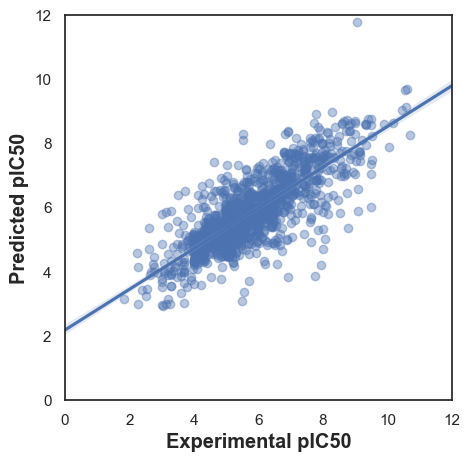

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# TSNE

In [89]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [90]:
embedings = model.layers[0].get_weights()[0][1:]

In [91]:
embedings.shape

(38, 128)

In [92]:
tsne = TSNE(2)
X_2d = tsne.fit_transform(embedings)

2023/02/04 15:26:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '56fe4a865df747868ad98f497a3cc756', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
2023/02/04 15:26:37 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2023/02/04 15:26:37 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not specify a `predict` function, whic

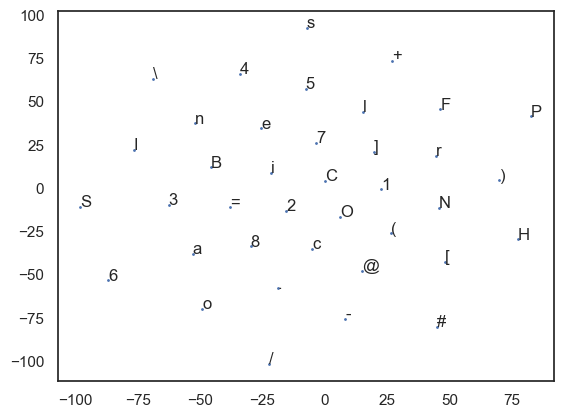

In [93]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], s=1)
for i, t in enumerate(tk.word_index):
    plt.text(X_2d[i, 0], X_2d[i, 1], t)

In [94]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

date and time = 04/02/2023 15:26:41
